## Meshal's integrated atlas of Human Lung Fibrosis

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

Running Scanpy 1.8.2, on 2022-11-06 15:10.


In [2]:
## path variables
adata_dir = '/home/niklas/data/210514_IPF_atlas_human/210611_in_vivo_reference_NIKLAS.h5ad'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/01_data/NicheNet_inputs/'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/IPF_cell_atlas_reference_CPC/02_figures/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object: 561279 cells × 61661 genes
adata

AnnData object with n_obs × n_vars = 561279 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    

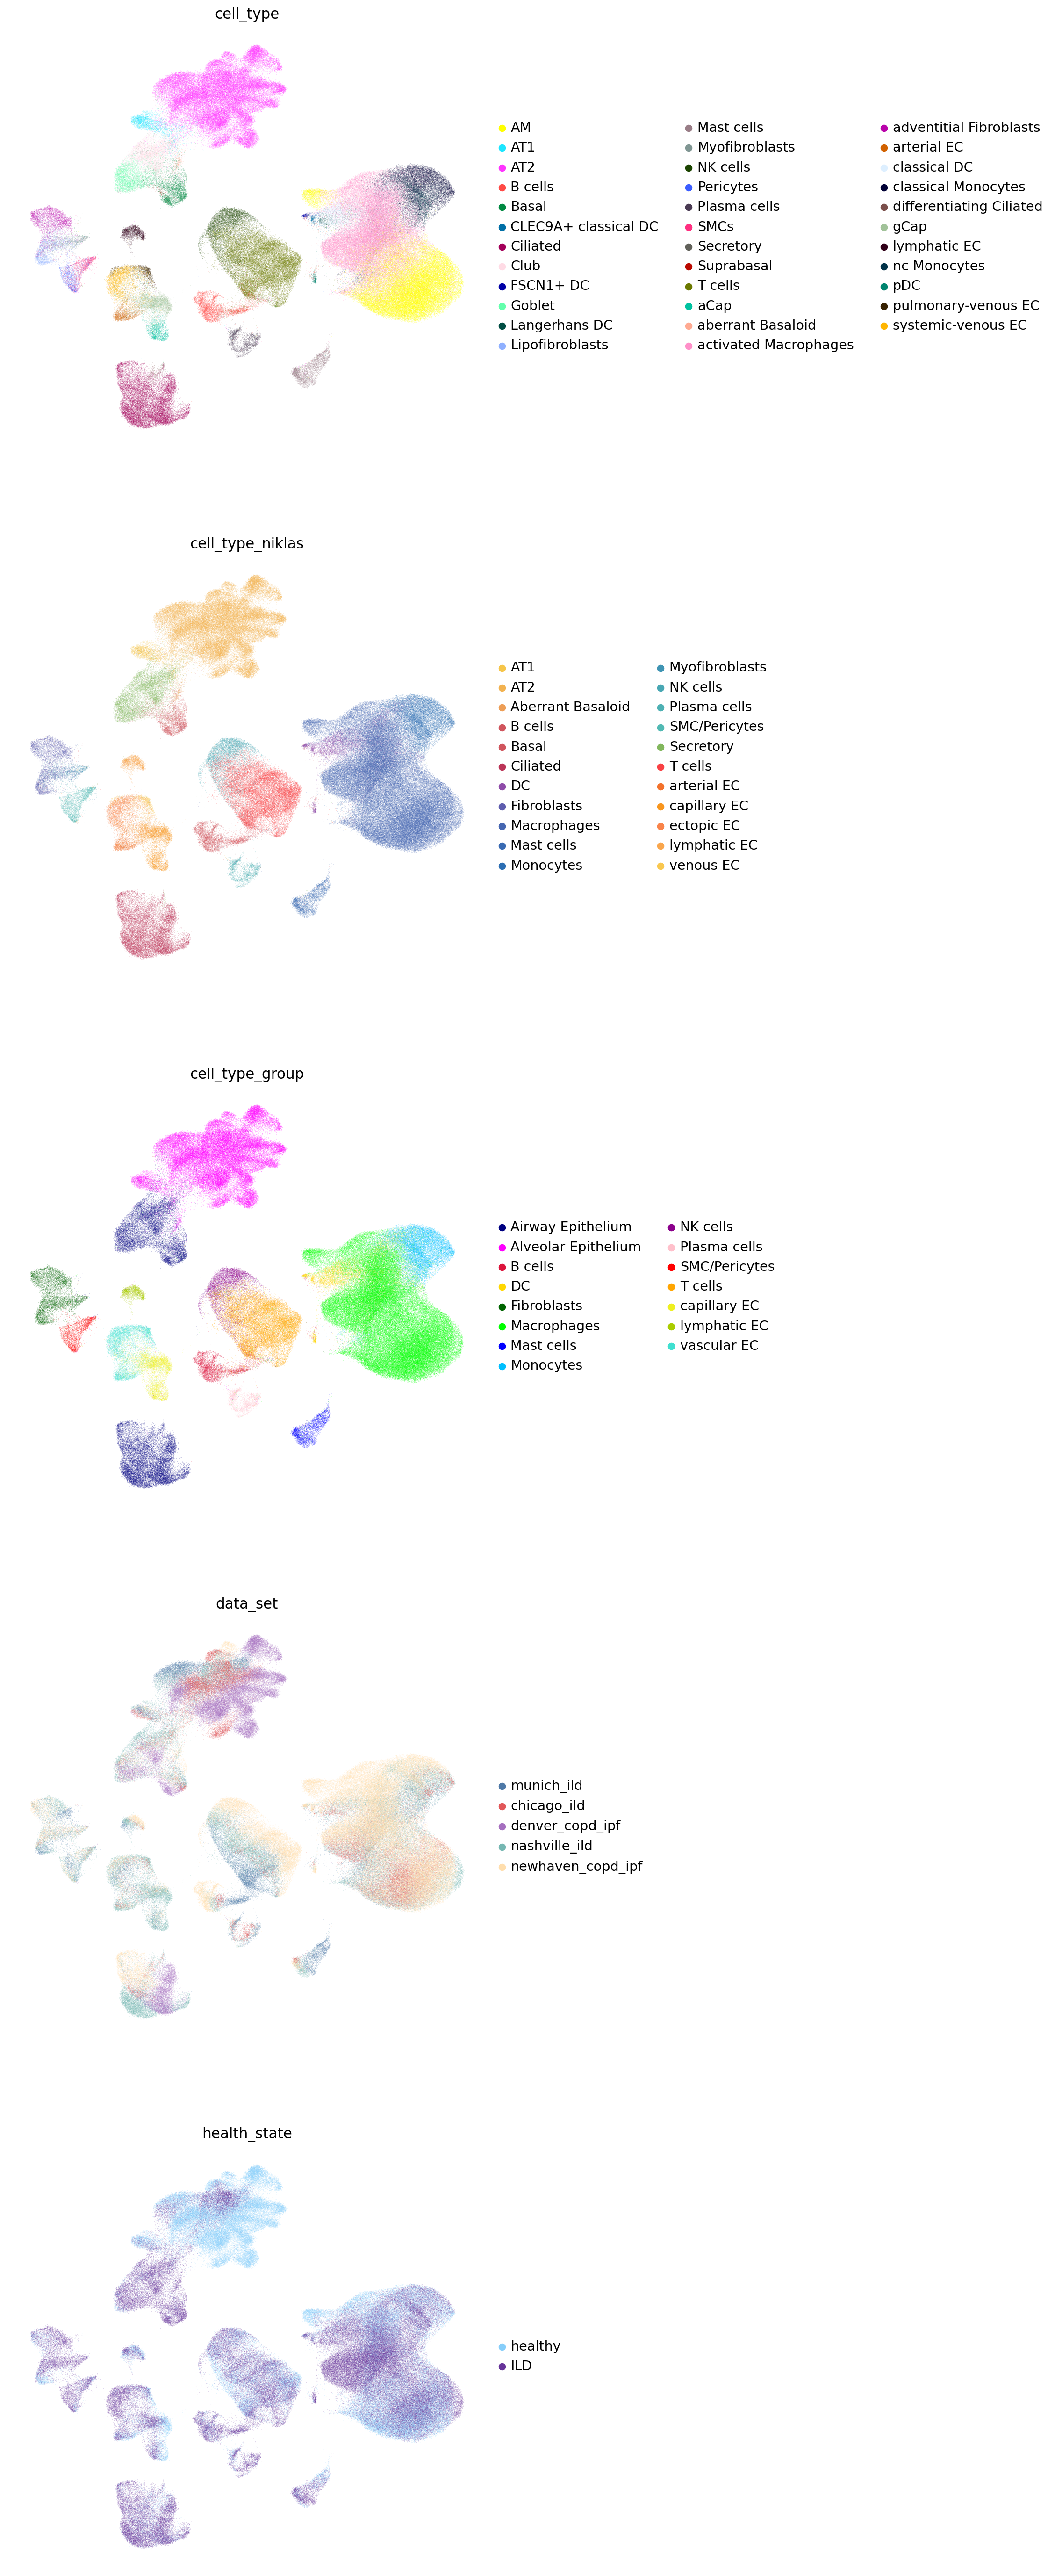

In [6]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type',
                           'cell_type_niklas',
                           'cell_type_group',
                           'data_set',
                           'health_state'], ncols = 1, frameon = False)

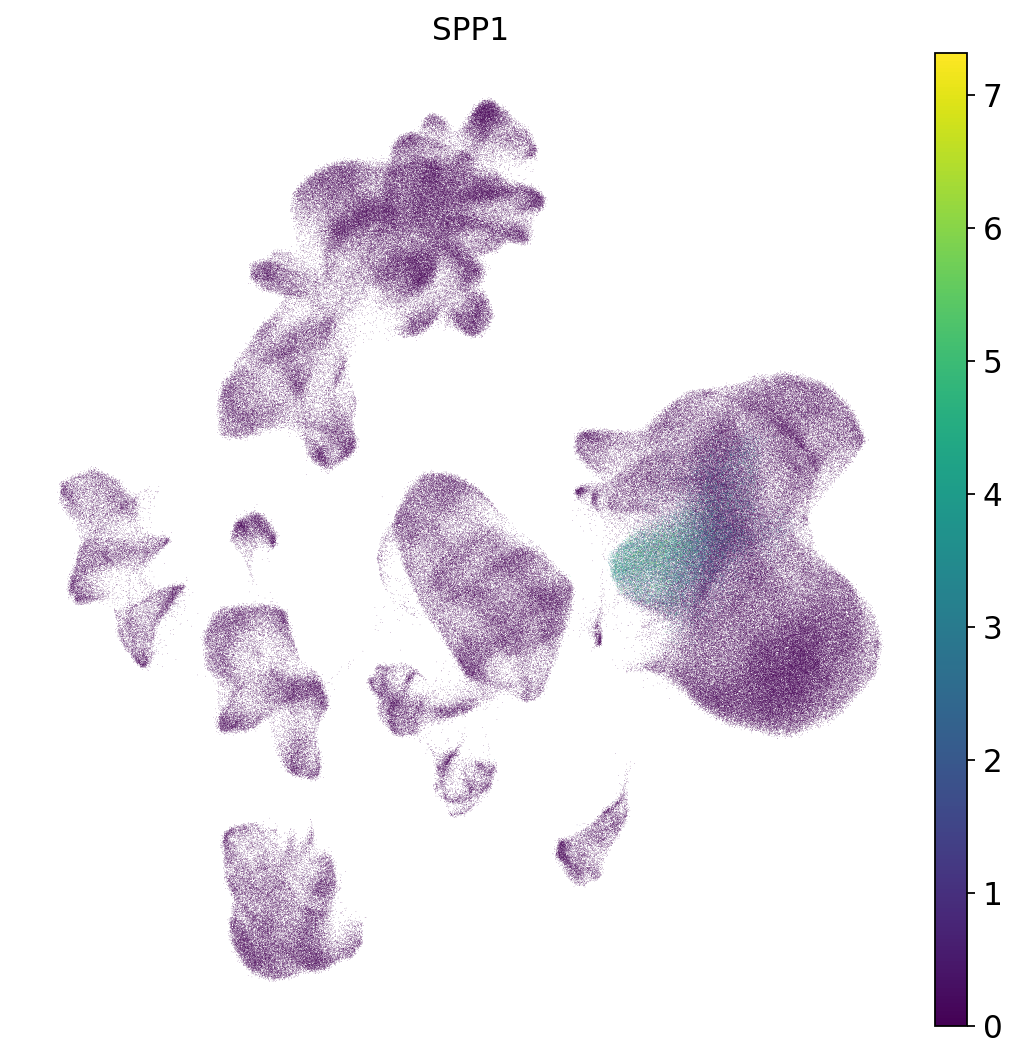

In [7]:
sc.pl.umap(adata, color = ['SPP1'], ncols = 1, frameon = False)

In [8]:
adata.obs['cell_type_nichenet'] = adata.obs.loc[:, ['cell_type', 'health_state']].agg('_'.join, axis = 1)
sc._utils.sanitize_anndata(adata)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type_nichenet' as categorical


In [9]:
adata.obs['cell_type_nichenet'].value_counts()

AT2_healthy                         94895
activated Macrophages_ILD           70154
AM_healthy                          49810
AM_ILD                              47457
activated Macrophages_healthy       32276
                                    ...  
FSCN1+ DC_healthy                     118
differentiating Ciliated_healthy       94
pDC_healthy                            52
Suprabasal_healthy                     37
aberrant Basaloid_healthy              22
Name: cell_type_nichenet, Length: 70, dtype: int64

In [10]:
adata.obs['cell_type_nichenet'].cat.categories

Index(['AM_ILD', 'AM_healthy', 'AT1_ILD', 'AT1_healthy', 'AT2_ILD',
       'AT2_healthy', 'B cells_ILD', 'B cells_healthy', 'Basal_ILD',
       'Basal_healthy', 'CLEC9A+ classical DC_ILD',
       'CLEC9A+ classical DC_healthy', 'Ciliated_ILD', 'Ciliated_healthy',
       'Club_ILD', 'Club_healthy', 'FSCN1+ DC_ILD', 'FSCN1+ DC_healthy',
       'Goblet_ILD', 'Goblet_healthy', 'Langerhans DC_ILD',
       'Langerhans DC_healthy', 'Lipofibroblasts_ILD',
       'Lipofibroblasts_healthy', 'Mast cells_ILD', 'Mast cells_healthy',
       'Myofibroblasts_ILD', 'Myofibroblasts_healthy', 'NK cells_ILD',
       'NK cells_healthy', 'Pericytes_ILD', 'Pericytes_healthy',
       'Plasma cells_ILD', 'Plasma cells_healthy', 'SMCs_ILD', 'SMCs_healthy',
       'Secretory_ILD', 'Secretory_healthy', 'Suprabasal_ILD',
       'Suprabasal_healthy', 'T cells_ILD', 'T cells_healthy', 'aCap_ILD',
       'aCap_healthy', 'aberrant Basaloid_ILD', 'aberrant Basaloid_healthy',
       'activated Macrophages_ILD', 'activat

In [11]:
cell_type_dict = {'AM_ILD' : 'Macrophages', 
                  'AM_healthy' : 'Macrophages',
                  'AT1_ILD' : 'other',
                  'AT1_healthy' : 'other',
                  'AT2_ILD' : 'AT2',
                  'AT2_healthy' : 'AT2',
                  'B cells_ILD' : 'other',
                  'B cells_healthy' : 'other',
                  'Basal_ILD' : 'other',
                  'Basal_healthy' : 'other',
                  'CLEC9A+ classical DC_ILD' : 'other',
                  'CLEC9A+ classical DC_healthy' : 'other',
                  'Ciliated_ILD' : 'other',
                  'Ciliated_healthy' : 'other',
                  'Club_ILD' : 'other',
                  'Club_healthy' : 'other',
                  'FSCN1+ DC_ILD' : 'other',
                  'FSCN1+ DC_healthy' : 'other',
                  'Goblet_ILD' : 'other',
                  'Goblet_healthy' : 'other',
                  'Langerhans DC_ILD' : 'other',
                  'Langerhans DC_healthy' : 'other',
                  'Lipofibroblasts_ILD' : 'Fibroblasts',
                  'Lipofibroblasts_healthy': 'Fibroblasts',
                  'Mast cells_ILD' : 'other',
                  'Mast cells_healthy' : 'other',
                  'Myofibroblasts_ILD' : 'Myofibroblasts',
                  'Myofibroblasts_healthy' : 'Myofibroblasts',
                  'NK cells_ILD' : 'other',
                  'NK cells_healthy' : 'other',
                  'Pericytes_ILD' : 'SMC_Pericytes_PF',
                  'Pericytes_healthy' : 'SMC_Pericytes_control',
                  'Plasma cells_ILD' : 'other',
                  'Plasma cells_healthy' : 'other',
                  'SMCs_ILD' : 'SMC_Pericytes_PF',
                  'SMCs_healthy' : 'SMC_Pericytes_control',
                  'Secretory_ILD' : 'other',
                  'Secretory_healthy' : 'other',
                  'Suprabasal_ILD' : 'other',
                  'Suprabasal_healthy' : 'other',
                  'T cells_ILD' : 'other',
                  'T cells_healthy' : 'other',
                  'aCap_ILD' : 'other',
                  'aCap_healthy' : 'other',
                  'aberrant Basaloid_ILD' : 'Aberrant Basaloid',
                  'aberrant Basaloid_healthy' : 'Aberrant Basaloid',
                  'activated Macrophages_ILD' : 'Profibrotic Macrophages',
                  'activated Macrophages_healthy' : 'Profibrotic Macrophages',
                  'adventitial Fibroblasts_ILD' : 'Fibroblasts',
                  'adventitial Fibroblasts_healthy' : 'Fibroblasts',
                  'arterial EC_ILD' : 'vascular EC',
                  'arterial EC_healthy' : 'vascular EC',
                  'classical DC_ILD' : 'other',
                  'classical DC_healthy' : 'other',
                  'classical Monocytes_ILD' : 'other',
                  'classical Monocytes_healthy' : 'other',
                  'differentiating Ciliated_ILD' : 'other',
                  'differentiating Ciliated_healthy' : 'other',
                  'gCap_ILD' : 'other',
                  'gCap_healthy' : 'other',
                  'lymphatic EC_ILD' : 'other',
                  'lymphatic EC_healthy' : 'other',
                  'nc Monocytes_ILD' : 'other',
                  'nc Monocytes_healthy' : 'other',
                  'pDC_ILD' : 'other',
                  'pDC_healthy' : 'other',
                  'pulmonary-venous EC_ILD' : 'vascular EC',
                  'pulmonary-venous EC_healthy' : 'vascular EC',
                  'systemic-venous EC_ILD' : 'ectopic EC',
                  'systemic-venous EC_healthy' : 'ectopic EC'
}

In [12]:
adata.obs['cell_type_nichenet'] = [cell_type_dict[ct] for ct in adata.obs['cell_type_nichenet']]

In [13]:
adata.obs['cell_type_nichenet'].value_counts()

other                      216309
AT2                        111548
Profibrotic Macrophages    102430
Macrophages                 97267
Fibroblasts                 10944
ectopic EC                   7648
vascular EC                  5742
SMC_Pericytes_PF             4763
Myofibroblasts               2859
Aberrant Basaloid             923
SMC_Pericytes_control         846
Name: cell_type_nichenet, dtype: int64

### Function to add pct expressed columns to marker table

In [14]:
## function to add pct expressed 
def add_pct(adata, tab, ids, group_by, thresh_min=0, gene_label='gene'):
    for ident in ids:
        
        # subset to cell type of interest
        cells_oi = adata.obs_names[adata.obs[group_by] == ident]
        # compute fraction (%) of cell type expressing each marker genes
        data_temp_oi = pd.DataFrame(((adata[cells_oi].layers['counts'] > 0).sum(0)
                / adata[cells_oi].layers['counts'].shape[0]).T, index=adata.var_names)
        
        # subset to all other cells (background)
        cells_background = adata.obs_names[adata.obs[group_by] != ident]
        # compute fraction (%) to background expressing each marker genes
        data_temp_background = pd.DataFrame(((adata[cells_background].layers['counts'] > 0).sum(0)
                / adata[cells_background].layers['counts'].shape[0]).T, index=adata.var_names)
        
        if gene_label == 'index':
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.index.values).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.index.values).values
        else:
            tab[f'pct_cell_type'] = data_temp_oi.reindex(tab.loc[:, gene_label]).values
            tab[f'pct_background'] = data_temp_background.reindex(tab.loc[:, gene_label]).values
    return tab

### Overall marker table

In [15]:
label = 'cell_type_nichenet'

In [16]:
sc.tl.rank_genes_groups(adata, groupby = label, groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)

ranking genes


/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type_nichenet' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:53:42)


In [21]:
## create marker table
result = adata.uns['rank_genes_groups']
all_markers = []
for cell_type in result['names'].dtype.names:
    ct_table = pd.DataFrame({'gene': result['names'][cell_type], 'score': result['scores'][cell_type],
                            'logfoldchange': result['logfoldchanges'][cell_type], 'pval': result['pvals'][cell_type],
                            'pval_adj': result['pvals_adj'][cell_type], 'cell_type': cell_type})
    # compute pct expressed for cell type and background
    ct_table = add_pct(adata, ct_table, [cell_type], group_by = label)
    # append to all markers table
    all_markers.append(ct_table)
    
## concat into pandas df  
all_markers = pd.concat(all_markers)

## filter by p value
all_markers = all_markers[all_markers.pval_adj < 0.1].copy()
## only consider genes expressed in at least 25% of cells of cell type of interest
all_markers = all_markers[all_markers.pct_cell_type > 0.25].copy()
## sort marker gene table by log FC and adjusted FC
all_markers = all_markers.sort_values(['cell_type','logfoldchange','pval_adj'], ascending=[True,False,True])
all_markers.head()

gene       score  logfoldchange  pval  pval_adj cell_type  \
6     SFTPC  436.693268      15.608378   0.0       0.0       AT2   
2    SFTPA1  472.954224      11.759998   0.0       0.0       AT2   
26      PGC  303.967987      11.015590   0.0       0.0       AT2   
3    SFTPA2  456.177612      10.812805   0.0       0.0       AT2   
95  PLA2G1B  229.262817      10.490555   0.0       0.0       AT2   

    pct_cell_type  pct_background  
6        0.843610        0.001018  
2        0.914718        0.005368  
26       0.587944        0.001697  
3        0.884005        0.007831  
95       0.443289        0.000725

In [22]:
# save all markers table
all_markers.to_csv(project_dir + '221106_CPC_IPF_reference_celltype_marker_table_OVERALL_cell_circuits.csv')

### Calculate average expression table

In [23]:
## for each treatment separately - but always pooled with CC
for treatment in ['ILD']:
    adata_sub = adata[adata.obs.health_state.isin(['healthy',treatment])].copy()
    avg_expr_ct = pd.DataFrame(columns=adata_sub.var_names, index=adata_sub.obs['cell_type_nichenet'].cat.categories)                                                                                                 
    for cell_type in adata_sub.obs.cell_type_nichenet.cat.categories: 
        avg_expr_ct.loc[cell_type] = adata_sub[adata_sub.obs['cell_type_nichenet'].isin([cell_type]),:].X.mean(0)
    avg_expr_ct = avg_expr_ct.transpose()
    avg_expr_ct_SCALED = avg_expr_ct.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 1)
    avg_expr_ct.to_csv(project_dir + '221106_CPC_IPF_reference_avg_expr_cell_type_level.csv')
    avg_expr_ct_SCALED.to_csv(project_dir + '221106_CPC_IPF_reference_avg_expr_SCALED_cell_type_level.csv')

### Calculate pct expressed table

In [25]:
## for each treatment separately - but always pooled with CC
for treatment in ['ILD']:
    adata_sub = adata[adata.obs.health_state.isin(['healthy',treatment])].copy()
    pct_expr_ct = pd.DataFrame(columns=adata_sub.raw.var_names, index=adata_sub.obs['cell_type_nichenet'].cat.categories) 
    for cell_type in adata_sub.obs.cell_type_nichenet.cat.categories:
        cells = adata_sub.obs_names[adata_sub.obs['cell_type_nichenet'] == cell_type]
        pct_expr_ct.loc[cell_type] = (adata_sub.raw[cells].X > 0).sum(0) / adata_sub.raw[cells].X.shape[0]
    pct_expr_ct = pct_expr_ct.transpose()
    pct_expr_ct.to_csv(project_dir + '221106_CPC_IPF_reference_pct_expr_cell_type_level.csv')